## Understand Gradient descent and implementing it from scratch.
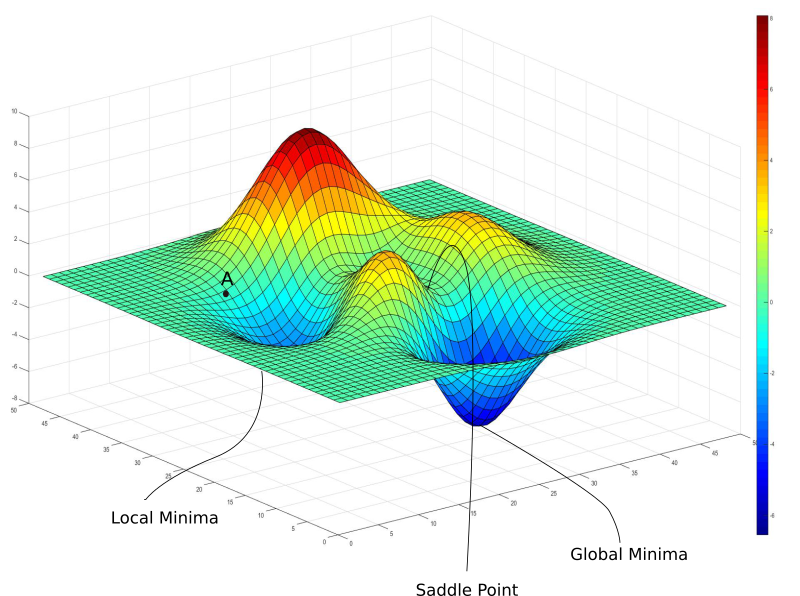

Hello everyone! In this tutorial, we will discuss the fundamentals of some machine learning concepts like Gradient descent which is the foundation as well as the heart of all learning-based algorithms in machine learning and deep learning. 

#### Gradient descent

From the title itself, we can have a rough idea about it is something related to gradients. Also, the second word is descent which means some thing going down, so an intuitive rough meaning can be like gradient of a thing getting decreased iteratively. And the thing which gets decreased is loss of a model. (More discussed below). So before going through the topic straight, let us have a quick look at what are gradients.

#### What are Gradients

Here I am assuming that the readers at least know the very fundamentals of calculus. So gradients are nothing but it's a change of one quantity w.r.t the other quantity. Where the first quantity is the parameters that compute the output in an ML model. And the other quantity is the loss. So in machine learning gradients measures the **change of weights (parameters)** w.r.t **the loss of the model.**

And more mathematically, a gradient is a derivative of a multivariable function (or the slope of the function) that simply measures the change of all weights w.r.t error of the model. [Check this out in order to know more about gradients.](https://en.wikipedia.org/wiki/Gradient)


### Implementing gradient descent from scratch

So there is one more good news! here, we will not only be applying gradient descent from scratch but also, we will be implementing logistic regression from scratch. The reason is that to show how Gradient descent works, we have to show with the help of a learning-based algorithm. There are several learning-based algorithms, but among them, one of the foundational and comparatively simple algorithms to implement is **Logistic Regression**. This is a classification-based ML algorithm, which is capable of classifying data points into 2 or more than 2 classes.

So what we will learn here?
1. How to One Hot Encoding for Multiple class classification as well as Reverse One Hot Encoding
2. How to implement simple linear algebra techniques for predictions of the model
3. Introduction to softmax function and its derivative
4. Finally implementing Gradient descent algorithm and getting awesome results from our model.

The dataset we will be using here is **Iris Dataset**.
 So before getting started lets, just import some basic libraries
 
### Importing the basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

As you can see from the above cell, that we are not using any ML libraries, which makes this much cooler, polishing out foundational concepts to understand the algorithms much better. Now we will do get our data and split it into train and test datasets. We will be dividing the train and test dataset on a ratio of 80% train and 20% test dataset.

### Loading the dataset and splitting the dataset into train and test

In [2]:
features, labels = load_iris()['data'], load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

So as we got the `X_train`, `y_train` and `X_test` and `y_test` after applying train_test_split() function, also we shuffled the data. Before going for conversion of One Hot Encoding, we have to remember and take a note of the dimensionality convention of the different data.

So from our data, the dimensions are as follows:
1. X_train, X_test  | (number_of_examples, number_of_features)
2. y_train, y_test  | (number_of_examples)

and values of y_train/test is a simple 1D array like [0,1,2,0,....] , and we wanna convert into One Hot Vector, i.e. [each of the elements in that 1D array would be a row vector](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) itself, where all other elements are 0 except the index which is same to the element in the 1D array

e.g.
```
[0,1,2] -- One Hot Encode --> [[1,0,0],
                               [0,1,0],
                               [0,0,1]]
```
This is very much helpful while applying multi-class classification, as here `Softmax()` (we will know about it later) which helps for more accurate predictions. Now we will code about converting a 1D array to its corresponding One Hot encode.

### Conversion of a 1D array to its One Hot Encoding Vectors

In [3]:
def OneHotEncode(y):
    """
    Algorithm steps:
    1. Create a Zero Matrix of dimension (number_of_examples, num_of_class) first.
    2. Iterate over the 1D array.
    3. Now for every 1D array in the 2D matrix we 
       will change the the value of that element to 1 who index = the element in 1D array
    4. And finally return the matrix, and this matrix is the One Hot Encoded array.
    """
    unique_class = np.unique(y)
    OHE = np.zeros(shape=(len(y), len(unique_class)))
    for idx, class_idx in enumerate(y):
        OHE[idx][class_idx] = 1
    return OHE

Once One Hot Encoding is done, we will convert our `y_train` and `y_test` to one hot encoded arrays

In [4]:
y_train = OneHotEncode(y_train)
y_test = OneHotEncode(y_test)

So finally the dimensions of the each of the data will be as follows:
1. X_train, X_test  | (number_of_examples, number_of_features)
2. y_train, y_test  | (number_of_examples, number_of_classes)

Here is an example for this dataset

In [5]:
print(f"Shape of X_train : {X_train.shape}, and shape of y_train : {y_train.shape}")
print(f"Shape of X_test : {X_test.shape}, and shape of y_test : {y_test.shape}")

Shape of X_train : (120, 4), and shape of y_train : (120, 3)
Shape of X_test : (30, 4), and shape of y_test : (30, 3)


Also, as we have done One Hot Encoding, it is important at the same time, to decode to its original 1D vector, as this is required sometimes when we need to get our `y` in the original state to see the accuracy of our prediction (discussed more later). So here is a simple code of decoding a 2D One Hot vector to its original 1D vector.

In [6]:
def reverseOHE(y):
    values = []
    for i in y:
        values.append(np.where(i == 1)[0].item())
    return np.array(values)

### Intializations of parameters.

Now, as told before that gradient descent is a simple parameter updation algorithm, that generally updates the parameters such as weights and bias w.r.t the Loss of the model. But before that, we need to predict some results to get that loss. So that step of predicting some results based on some given input data is known as the feed-forward step. So to do that, we need to have some parameters in hand. Those parameters are known as weights and biases. I hope, you are familiar with the terms of weights, bias. Otherwise, [check this out.](https://docs.paperspace.com/machine-learning/wiki/weights-and-biases). Now to initialize our weights, we have to know how the feed-forward network works.

Feedforward is a simple matrix multiplication of two matrices or matrix, vector or vector, vector (depends upon the situation). Here the feed-forward step would do a simple matrix multiplication of `X` and weight `W`, such that the output would have the same dimension as of `y`. So to do this our weights dimension must be in such a way that it can be compatible with the matrix multiplication with `X` and at the same time outputs a vector/matrix which has a similar dimension like `y`. 

So if the dimension of `X` is `(num of examples, num of features)` and the dimension of `y` is `num of examples, num of classes`. Then the dimension of weight `W` will be `(num_of_features, num_of_classes`, then only the result will of `X. W` will have dimension same as `y`. And `bias` will just be a single 1D vector that has to be added just after the matrix multiplication of `X.W` and the bias `b` can resize itself automatically to the corresponding result of `X.W` , and this property is known as [Broadcasting](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/).

So now initializing weights can be of different ways. A most naive way is to set all values to zeros or set all values to some random values. A bit better approach is to set random values, such that those random values are in a uniform distribution. Though this may not create much difference. But sometimes, only random initialization may create some values whose variance is quite high, and for that Gradient descent steps for those values takes a lot of time. For more info check this out [here.](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79)

So now we are gonna initialize our weights and bias (as a whole known as parameters) and will store them in a dictionary. The weights will get uniformly distributed, and the values will be in a range of `(-1/root(n), 1/root(n))` where n = number of features. Also, bias will be set to zero.

In [7]:
num_classes = 3
n = X_train.shape[1]

W = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (X_train.shape[1], num_classes))
b = np.zeros(shape=(1))
parameters = {
    "weights" : W,
    "bias"    : b
}

In [8]:
print(f"The dimension of the weight (W) is: {parameters['weights'].shape}")
print(f"The dimension of the bias (b) is : {parameters['bias'].shape}")

The dimension of the weight (W) is: (4, 3)
The dimension of the bias (b) is : (1,)


### Feed forward and softmax activation function.

Before starting feed forward, we need to first know about what is known as activation functions. Activation functions are those function that helps the model to learn the complex pattern of the data. There are several activation functions, each of them has some unique attribute to transform the data (non-linearly). From them, one important activation function is the softmax activation function. In general, a softmax activation function looks like this: 

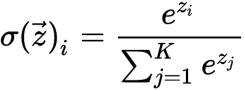

Where ${\sigma}$ is softmax function, ${\vec z}_{i}$ is ith the element of vector ${Z}$ and the denominator is the sum of all the vector elements. So does this equation kinda look like finding probability? That's right so from this equation, we can tell the probability of occurrence of an index of the vector. So for example for a vector after passing through softmax is like : [0.1, 0.8, 0.1], this means the probability of occurrence of index 0, 2 is 0.1 whereas the probability of occurrence of index 1 is 0.8 (highest) and that index is gonna be the predicted class. So now let us code our softmax function.

In [9]:
def softmax(Z):
    diff = np.exp(Z - np.max(Z))
    return diff/np.sum(diff, axis = 1, keepdims=True)

Ok now, we got our weights initialized, we got our One Hot Encoded vectors, we also got our activation functions. Now it's time to have to perform feed forward computation. Now, this is very simple, here we will have to generate two different values, one vector is ${Z}$ and the other is $\hat{y}$. Where  ${Z} = ({X} . {W}) + {b}$ and ${A} = {\sigma}({Z})$ where ${\sigma}$ is softmax function and ${A}$ is the predicted probabilities also known as `logits` And we will require ${Z}$ and ${A}$ vectors for further computation for prediction and gradient descent. So we will return in a form of a dictionary called `cache`. So let us code this up.

In [10]:
def feed_forward(X, parameters):
    Z = np.dot(X, parameters["weights"]) + parameters["bias"]
    A = softmax(Z)
    cache = {
        "Z": Z,
        "A": A
    }
    return cache

Now we got our cache, we can now have a function called `predict()` that will take those `logits` as inputs and will return the maximum index with the highest `logits`. for example in the previous example [0.1, 0.8, 0.1], here the probability of occurrence of index 0, 2 is 0.1 whereas the probability of occurrence of index 1 is 0.8 (highest). So we will return `1` as output. So let us code this function up.

In [11]:
def predict(y_pred):
    return np.argmax(y_pred, axis=1)

### Loss and Accuracy computations

In simple words, a loss is the distance/difference between the predicted `(logits not the prediction)` and the actual truth values. Suppose, we are having some logits A, and ground truth vector y then we can simply define loss as ${(y-A)}$. But this is not an optimal or an efficient way of defining the loss. So there are different losses, based on the type of the task we are doing in ML (i.e regression/classification) also choosing a correct loss depends on the machine learning algorithm we are working on. For example, while working on support vector machines, we are supposed to take a loss named `Hinge loss` which works best in that, whereas for algorithms like `linear regression` we take loss named `Root  Mean Square` loss. In classification algorithms like Logistic regression, if the task is simple binary classification, then we consider loss called `Binary Cross Entropy` whereas for a task like multi-class classification we perform `Cross Entropy` loss. So here in this context, we will be discussing simply `Cross Entropy` loss. For more information on different types of activation functions, [check out this link.](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23)

**Cross-Entropy Loss**
Cross-Entropy loss is defined as : $$\frac{1}{m} \sum \limits_{i = 1} ^{N}( y_{i} \log {\hat y}_{i})$$Now doing this thing in code iteratively would be really in-efficient. So we are gonna do it in vectorized form. Now if you don't have much idea about vectorization then check out this. So now let us code our loss function.

In [12]:
def CrossEntropyLoss(y_pred, y_true):
    """
    np.sum() function does this sum more efficiently
    m is the number of examples.
    1e-8 is an important value, that prevents to get nan values when ylog(y_hat) --> 0
    """
    m = len(y_pred)
    loss = -1/m * np.sum(y_true * np.log(y_pred + 1e-8), keepdims=True)
    return loss

So now our `loss` function is done, so now, it's time to make another function that will check the accuracy of the predicted values `not logits but the predictions`. The logic is simple here, just we have to compare every element of the ground truth ${Y}$ and ${\hat Y}$ vectors and count the total number of correct values. And finally, divide them by the total number of elements in prediction ${N}$. Now you are well aware of the fact that the predicted values will be 1D vectors whereas, on the other hand, the truth values are in One Hot Encoding format. So we have to take them back into their actual form. So here we need the function `reverseOHE` to decode the One Hot Encoded format to the original format. So here comes our `accuracy` function

In [13]:
def accuracy(y_pred, y_truth):
    """
    The one constraint of this accuracy function is that y_truth must be in One Hot Encoded format.
    """
    return np.sum(y_pred == reverseOHE(y_truth))/len(y_pred)

### Checking our progress and testing out our untrained model made till now.
So, we have implemented several things. Now we need to see, what are the things we have done till now, and test them with our `X_train()`. Though results will be very poor as our model is UNTRAINED. So this is a checkpoint before implementing gradient descent.

In [14]:
sample_cache = feed_forward(X_train, parameters)

In [15]:
sample_logits = sample_cache["A"]
sample_loss = CrossEntropyLoss(sample_logits, y_train)

sample_predictions = predict(sample_logits)
sample_accuracy = accuracy(sample_predictions, y_train)

print(f"The loss of the untrained model is : {round(sample_loss.item(),3)}")
print(f"The accuracy of the untrained model is : {round(sample_accuracy, 3)}")

The loss of the untrained model is : 1.777
The accuracy of the untrained model is : 0.3


### Gradient Descent Algorithm

Now we got our loss, its time to take the gradient of ${W}$ w.r.t the loss i.e. ${\frac{dL}{dW}}$ and also for bias ${b}$ i.e. ${\frac{dL}{db}}$. So in order to do this, lets just take a look of the feed forward equations and the loss:


$${Z} = ({X} . {W}) + {b}$$
$${A} = {\sigma}({Z})$$
$${L({y, \hat y})} = \frac{1}{m} \sum \limits_{i = 1} ^{N}( y_{i} \log {\hat y}_{i})$$

So clearly ${W}$ depends on ${Z}$ and ${Z}$ depends on ${A}$ and here ${\hat y} = {A}$  so, in order to take the derivative of ${\frac{dL}{dW}}$, we need to first compute the derivative of ${\frac{dL}{dZ}}$, which comes to be ${(y - \hat y)}$ [refer to this, if you want to know the derivative of softmax and its derivative w.r.t the loss here](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/). So as we got ${\frac{dL}{dZ}}$, now we can compute ${\frac{dZ}{dW}}$ and from chain rule we can say that ${\frac{dL}{dW}} = {\frac{dL}{dZ}} \times {\frac{dZ}{dW}}$ (from chain rule) and finally ${\frac{dZ}{dW}} = {X}^T$. So finally our ${\frac{dL}{dW}} = {X^T} . {(y - \hat y)}$ and similarly ${\frac{dZ}{db}} = 1$ so therefore ${\frac{dL}{db}} = \sum \limits_{i = 1} ^{m} {(y_{i} - \hat y_{i})}$ where ${m}$ is the number of examples. So lets just code this up a function to find the gradients of the parameters w.r.t the loss, and storing them in a dictionary called `grads`.

In [16]:
def compute_grads(parameters, cache, X, y_truth):
    delta = cache["A"] - y_truth
    dW_grad = np.dot(X.T, delta)
    db_grad = 1/(len(y_truth)) * np.sum(delta)
    grads = {
        "W_grad" : dW_grad,
        "b_grad" : db_grad
    }
    return grads

Ok, so once we found the gradients of the functions, now we can have to do a thing such that we can update our `weights` and `biases` w.r.t the gradients, at a certain rate. We need to update these weights in such a way that the `loss` reaches the global minimum. Which means that the loss can not decrease any further. In that condition, we can say that the loss has reached the global minimum. Also, as I have mentioned before that we need to update the parameters at a certain rate, this rate is called `learning rate`, which means, we want to descent our gradients in such a way that they could reach the global minima as fast as possible. Though `learning rate` is a `hyperparameter` means that it does not depend upon the gradients and is not to be trained. It's a user-defined constant, whose optimal value is a trial and error process. So choosing a good learning rate wisely is very much important. If the learning rate is too low, then the time to reach the global minimum is too slow. And on the other hand, if the learning rate is too high, then the gradients would jump around the minima, and may not reach the global minima. See the picture below. So choosing a good optimal learning rate is important. So our final equation becomes:

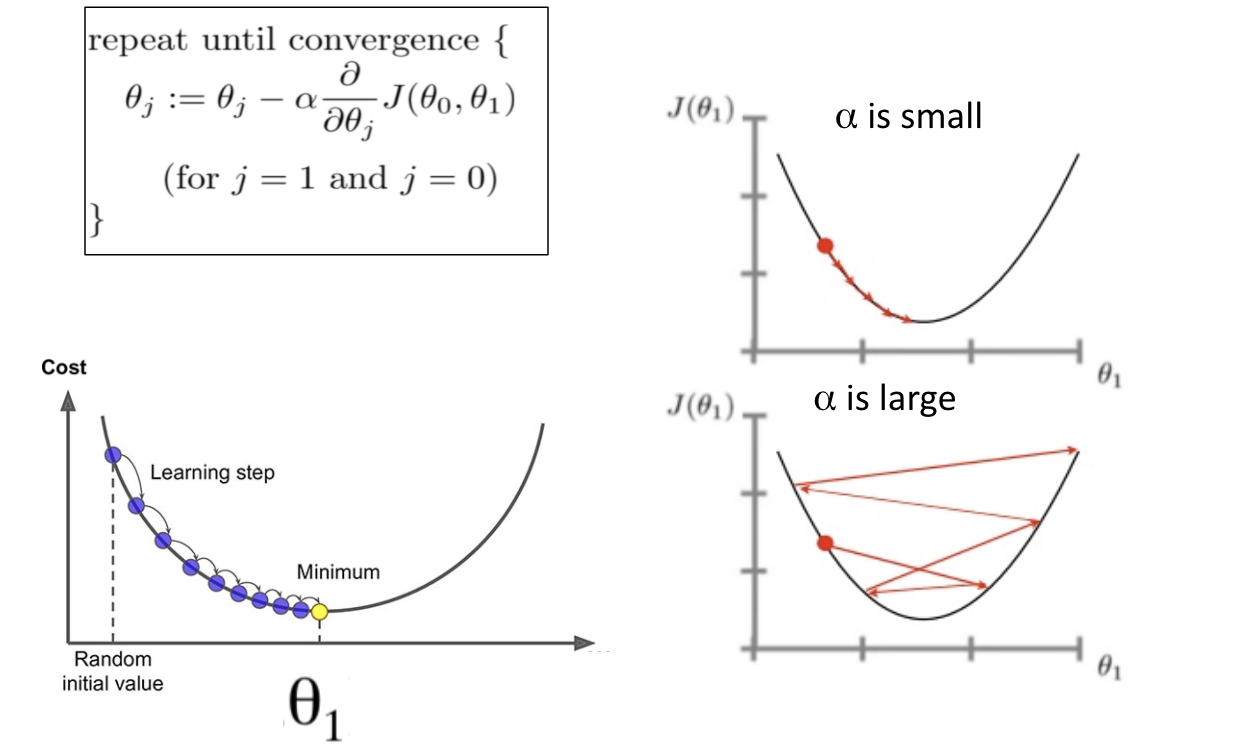

$${W_{updated} = {W}_{old} - {lr} \times {\frac{dL}{dW}}}$$ 
$${b_{updated} = {b}_{old} - {lr} \times {\frac{dL}{db}}}$$ 

So now let's code a function named `gradient descent that will take the `learning rate`, `grads`, `parameters` as inputs and will return the `update parameters` as output.

In [17]:
def gradient_descent(learning_rate, grads, parameters):
    parameters["weights"] -= learning_rate * grads["W_grad"]
    parameters["bias"] -= learning_rate * grads["b_grad"]
    return parameters

So now we are ready to use this gradient descent algorithm to train our model. The training process is nothing but the iterative process of gradient descent based on some epochs. An epoch is a total time from a full feed-forward process to the gradient descent process. So this is also a hyperparameter itself. An optimal epoch choosing is also important, more than that can cause overfitting. And taking very few epochs can cause underfitting. [Learn more about over and under-fitting here](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/). So a full training loop algorithm looks somewhat like this.

```
for each epoch :
        get the cache (Z, A) from the feed-forward
        get the loss of the model
        show the loss and accuracy
        update the parameters of the model using gradient descent
```

Here is a sample code for the training loop of the model.

In [18]:
def train_model(X_train, y_train, parameters, learning_rate, epochs):
    for epoch in range(epochs):
        cache = feed_forward(X_train, parameters)
        Z, A = cache["Z"], cache["A"]
        predictions = predict(A)
        loss = CrossEntropyLoss(A, y_train)
        acc = accuracy(predictions, y_train)
        if epoch % 100 == 0:
            print(f"After epoch {epoch} : loss : {round(loss.item(),3)} and accuracy : {round(acc, 3)}")
        grads = compute_grads(parameters, cache, X_train, y_train)
        parameters = gradient_descent(learning_rate, grads, parameters)
    return parameters

Yayyy!, We have done it we have not only implemented gradient descent from scratch, but also implemented Logistic regression from scratch. Now its time for final show down, to see the training of the model.

In [19]:
new_parameters = train_model(X_train, y_train, parameters, 0.0003, 600)

After epoch 0 : loss : 1.777 and accuracy : 0.3
After epoch 100 : loss : 0.514 and accuracy : 0.9
After epoch 200 : loss : 0.412 and accuracy : 0.942
After epoch 300 : loss : 0.357 and accuracy : 0.942
After epoch 400 : loss : 0.319 and accuracy : 0.95
After epoch 500 : loss : 0.291 and accuracy : 0.958


Now we can also train the model in lesser number of epochs by adjusting learning rate more. Feel free to play by tweaking the learning rate and the epochs. Now its time to see, how the model is working on the test dataset. As this is teh situation in which we can actually confirm our working status of the model.

In [20]:
test_cache = feed_forward(X_test, new_parameters)

In [21]:
test_Z, test_A = test_cache["Z"], test_cache["A"]
test_prediction = predict(test_A)

test_loss = CrossEntropyLoss(test_A, y_test)
test_acc  = accuracy(test_prediction, y_test)

In [22]:
print(f"The loss of the trained model on test dataset is : {round(test_loss.item(),3)}")
print(f"The accuracy of the trained model on test dataset is : {round(test_acc, 3)}")

The loss of the trained model on test dataset is : 0.283
The accuracy of the trained model on test dataset is : 1.0


Wowww.... the model is working really great as the accuracy is 100% , which means the model is `just right model`.  So in this tutorial, I hope we learned several new things. Thank you.